In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


# importing data

In [19]:
df = pd.read_json('dane_challenger_200_5.json')
challanges = pd.DataFrame(list(df['challenges'])) #unpacking challenges
df = df.join(challanges, lsuffix='_t', rsuffix='_c')
df = df.fillna(0)
df = df.drop(columns=['challenges',
         'championName',
         'individualPosition',
         'lane',
         'perks',
         'riotIdTagline',
         'riotIdName',
         'role',
         'summonerId',
         'summonerName',
         'puuid',
         'teamPosition']) #droping packed data, had nothing curious
df


assists  baronKills  bountyLevel  champExperience  champLevel  \
0          5           0            0            16916          17   
1          5           0            0            10191          13   
2          1           0            0            11860          14   
3          3           0            0            11496          14   
4          6           2            1            16544          17   
..       ...         ...          ...              ...         ...   
994       17           0            1            11145          13   
995        5           0            0            18876          18   
996        2           0            0             8027          11   
998        0           0            0             7598          11   
999        7           0            0            18211          17   

     championId  championTransform  consumablesPurchased  \
0           517                  0                     4   
1           245                  0                     2   
2           777                  0                     2   
3           777                  0                     2   
4           245                  0                     1   
..          ...                ...                   ...   
994         888                  0                    18   
995         246                  0                     8   
996          91                  0                     3   
998         107                  0                     3   
999         119                  0                     4   

     damageDealtToBuildings  damageDealtToObjectives  ...  \
0                      6862                     7148  ...   
1                      3389                     3389  ...   
2                      3877                     3877  ...   
3                      1149                     2506  ...   
4                      2457                    19954  ...   
..                      ...                      ...  ...   
994                     776                     2235  ...   
995                    1090                     7506  ...   
996                       0                     1658  ...   
998                    2420                     2784  ...   
999                    9433                    26345  ...   

     thirdInhibitorDestroyedTime  controlWardTimeCoverageInRiverOrEnemyHalf  \
0                       0.000000                                        0.0   
1                       0.000000                                        0.0   
2                       0.000000                                        0.0   
3                       0.000000                                        0.0   
4                    2024.979222                                        0.0   
..                           ...                                        ...   
994                     0.000000                                        0.0   
995                     0.000000                                        0.0   
996                     0.000000                                        0.0   
998                     0.000000                                        0.0   
999                     0.000000                                        0.0   

     highestCrowdControlScore  earliestElderDragon  \
0                         0.0                  0.0   
1                         0.0                  0.0   
2                         0.0                  0.0   
3                         0.0                  0.0   
4                         0.0                  0.0   
..                        ...                  ...   
994                       0.0                  0.0   
995                       0.0                  0.0   
996                       0.0                  0.0   
998                       0.0                  0.0   
999                       0.0                  0.0   

     fasterSupportQuestCompletion  highestWardKills  teleportTakedowns  \
0                             0.0     

# visualization of correlation

In [4]:
plt.figure(figsize=(20,20),dpi=400)
cor = df.corr()
sns.heatmap(cor)
plt.show()

# Feature selection
### we can we have many correlated features, and if we deeply see data we can find columns with same rows

In [50]:
def VarianceThreshold_selection(data, var=0):
    """
    Variance Threshold is method to reduce dimention of data
    param data: data which be reduced
    param var: variance of data, default = 0
    """
    #Creating model
    selector = VarianceThreshold(threshold=var)

    #Fit the model
    selector.fit(data)

    #Formating
    df = data[data.columns[selector.get_support(indices=True)]]

    return df

df = VarianceThreshold_selection(df,0.9)
df


assists  bountyLevel  champExperience  champLevel  championId  \
0          5            0            16916          17         517   
1          5            0            10191          13         245   
2          1            0            11860          14         777   
3          3            0            11496          14         777   
4          6            1            16544          17         245   
..       ...          ...              ...         ...         ...   
994       17            1            11145          13         888   
995        5            0            18876          18         246   
996        2            0             8027          11          91   
998        0            0             7598          11         107   
999        7            0            18211          17         119   

     consumablesPurchased  damageDealtToBuildings  damageDealtToObjectives  \
0                       4                    6862                     7148   
1                       2                    3389                     3389   
2                       2                    3877                     3877   
3                       2                    1149                     2506   
4                       1                    2457                    19954   
..                    ...                     ...                      ...   
994                    18                     776                     2235   
995                     8                    1090                     7506   
996                     3                       0                     1658   
998                     3                    2420                     2784   
999                     4                    9433                    26345   

     damageSelfMitigated  deaths  ...  wardTakedowns  wardTakedownsBefore20M  \
0                  26808       9  ...            4.0                     1.0   
1                  12799      11  ...            3.0                     3.0   
2                  12695       2  ...            0.0                     0.0   
3                  18621       8  ...            1.0                     1.0   
4                  30532      10  ...            5.0                     4.0   
..                   ...     ...  ...            ...                     ...   
994                20166       8  ...            0.0                     0.0   
995                12559       8  ...            0.0                     0.0   
996                10129      10  ...            0.0                     0.0   
998                15956       9  ...            0.0                     0.0   
999                19168      13  ...            0.0                     0.0   

     firstTurretKilledTime  earliestBaron  earliestDragonTakedown  \
0                 0.000000       0.000000                0.000000   
1                 0.000000       0.000000                0.000000   
2               787.838186       0.000000                0.000000   
3                 0.000000       0.000000                0.000000   
4               780.965077    1382.463358             1253.347135   
..                     ...            ...                     ...   
994               0.000000       0.000000                0.000000   
995               0.000000       0.000000                0.000000   
996               0.000000       0.000000                0.000000   
998               0.000000       0.000000                0.000000   
999               0.000000       0.000000                0.000000   

     thirdInhibitorDestroyedTime  earliestElderDragon  fastestLegendary  \
0                       0.000000                  0.0               0.0   
1                       0.000000                  0.0               0.0   
2                       0.000000                  0.0               0.0   
3                       0.000000                  0.0               0.0   
4                    2024.979222                  0.0         

### reducing data with low variance we still have corrlelated data

In [31]:
plt.figure(figsize=(20,20),dpi=400)
cor = df.corr()
sns.heatmap(cor)
plt.show()

# droping high correlated data

In [38]:
matrix_corr = df.corr().abs() # -1 or 1 is the same high correlation
upper_tri = matrix_corr.where(np.triu(np.ones(matrix_corr.shape),k=1).astype(np.bool_)) #chosing upper triangular of matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] #bool what column drop
df = df.drop(columns=to_drop) #droping choosed columns
df


assists  bountyLevel  champExperience  champLevel  championId  \
0          5            0            16916          17         517   
1          5            0            10191          13         245   
2          1            0            11860          14         777   
3          3            0            11496          14         777   
4          6            1            16544          17         245   
..       ...          ...              ...         ...         ...   
994       17            1            11145          13         888   
995        5            0            18876          18         246   
996        2            0             8027          11          91   
998        0            0             7598          11         107   
999        7            0            18211          17         119   

     consumablesPurchased  damageDealtToBuildings  damageDealtToObjectives  \
0                       4                    6862                     7148   
1                       2                    3389                     3389   
2                       2                    3877                     3877   
3                       2                    1149                     2506   
4                       1                    2457                    19954   
..                    ...                     ...                      ...   
994                    18                     776                     2235   
995                     8                    1090                     7506   
996                     3                       0                     1658   
998                     3                    2420                     2784   
999                     4                    9433                    26345   

     damageSelfMitigated  deaths  ...  wardTakedowns  wardTakedownsBefore20M  \
0                  26808       9  ...            4.0                     1.0   
1                  12799      11  ...            3.0                     3.0   
2                  12695       2  ...            0.0                     0.0   
3                  18621       8  ...            1.0                     1.0   
4                  30532      10  ...            5.0                     4.0   
..                   ...     ...  ...            ...                     ...   
994                20166       8  ...            0.0                     0.0   
995                12559       8  ...            0.0                     0.0   
996                10129      10  ...            0.0                     0.0   
998                15956       9  ...            0.0                     0.0   
999                19168      13  ...            0.0                     0.0   

     firstTurretKilledTime  earliestBaron  earliestDragonTakedown  \
0                 0.000000       0.000000                0.000000   
1                 0.000000       0.000000                0.000000   
2               787.838186       0.000000                0.000000   
3                 0.000000       0.000000                0.000000   
4               780.965077    1382.463358             1253.347135   
..                     ...            ...                     ...   
994               0.000000       0.000000                0.000000   
995               0.000000       0.000000                0.000000   
996               0.000000       0.000000                0.000000   
998               0.000000       0.000000                0.000000   
999               0.000000       0.000000                0.000000   

     thirdInhibitorDestroyedTime  earliestElderDragon  fastestLegendary  \
0                       0.000000                  0.0               0.0   
1                       0.000000                  0.0               0.0   
2                       0.000000                  0.0               0.0   
3                       0.000000                  0.0               0.0   
4                    2024.979222                  0.0         

# using Hierarchical Agglomerative Clustering to cluster data

In [48]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='ward')
clustering.fit(df)
clustering.labels_

array([0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 3, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 1,
       2, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 3, 1, 0, 1, 0, 3, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 3, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 1, 2, 3, 0, 1, 3, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 3, 3, 1, 1, 3, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       1, 1, 1, 3, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 2, 2, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 2, 1, 1, 3, 0, 2, 0, 2, 2, 0, 0,

# Wizualizating with Pca

In [52]:
pca = PCA(n_components=2)

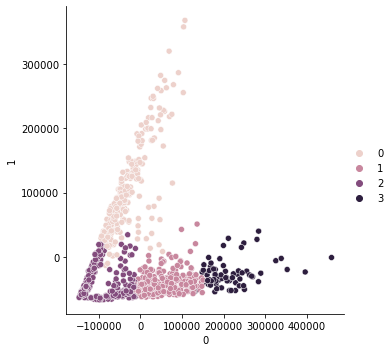

In [55]:
pca.fit(df)
to_visualise = pd.DataFrame(pca.fit_transform(df))
sns.relplot(kind='scatter',data=to_visualise,x=0,y=1,hue=clustering.labels_)


In [41]:
pca.explained_variance_ratio_

array([0.59918586, 0.3500003 ])